<h2 align=center> Expression training</h2>

### Task 1: Import Libraries

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesTensorFlowKeras
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

### Task 2: Generate Training and Validation Batches

In [4]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size=(img_size, img_size),
                                                   color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("test/",
                                                   target_size=(img_size, img_size),
                                                   color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)


NameError: name 'ImageDataGenerator' is not defined

### Task 3: Create CNN Model

In [3]:
model = Sequential()


model.add(Conv2D(46,(3,3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

NameError: name 'Sequential' is not defined

### Task 4: Train and Evaluate Model

In [11]:
epochs = 15


steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size


checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_weights_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
callbacks = [checkpoint, reduce_lr]

history = model.fit(x = train_generator,
                                steps_per_epoch=steps_per_epoch,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps =validation_steps,
                                callbacks=callbacks
                                )

Epoch 1/15
450/450 [==============================] - ETA: 0s - loss: 1.7949 - accuracy: 0.3111
Epoch 00001: saving model to model_weights.h5
450/450 [==============================] - 945s 2s/step - loss: 1.7949 - accuracy: 0.3111 - val_loss: 2.1412 - val_accuracy: 0.3406
Epoch 2/15
450/450 [==============================] - ETA: 0s - loss: 1.4931 - accuracy: 0.4267
Epoch 00002: saving model to model_weights.h5
450/450 [==============================] - 666s 1s/step - loss: 1.4931 - accuracy: 0.4267 - val_loss: 1.4517 - val_accuracy: 0.4464
Epoch 3/15
450/450 [==============================] - ETA: 0s - loss: 1.3441 - accuracy: 0.4831
Epoch 00003: saving model to model_weights.h5
450/450 [==============================] - 665s 1s/step - loss: 1.3441 - accuracy: 0.4831 - val_loss: 1.3619 - val_accuracy: 0.4842
Epoch 4/15
450/450 [==============================] - ETA: 0s - loss: 1.2621 - accuracy: 0.5170
Epoch 00004: saving model to model_weights.h5
450/450 [===========================

### Task 5: Represent Model as JSON String

In [14]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

### Task 6: Plotting graph for accuracy and loss

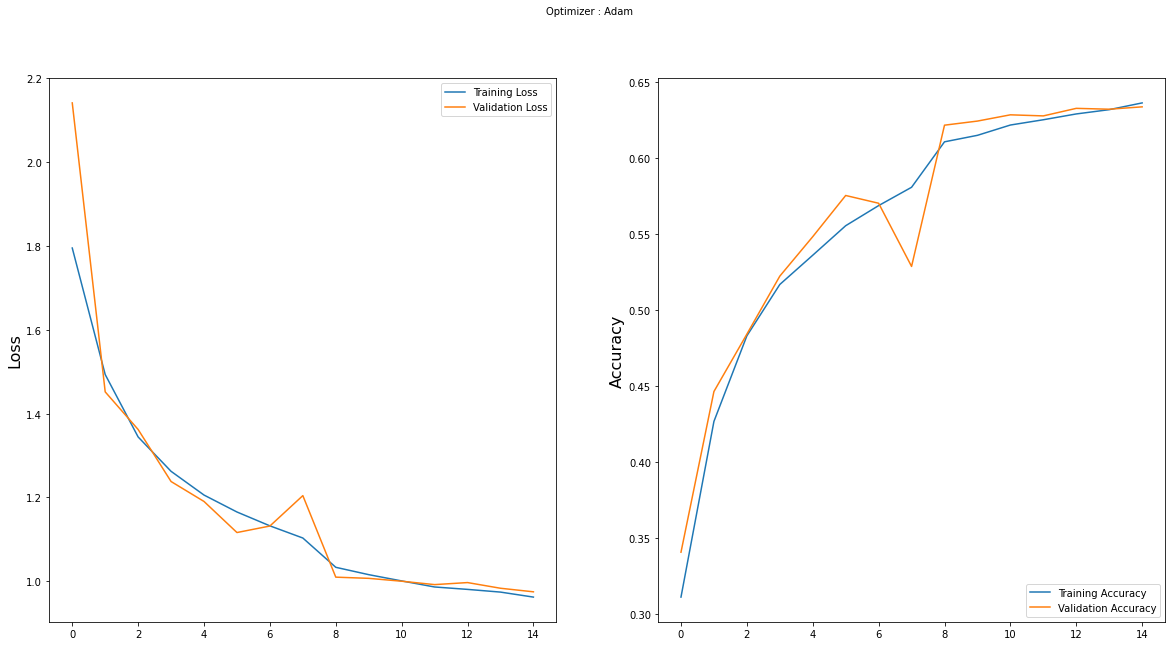

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()